In [3]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [4]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [5]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [7]:
ns_probs = [0 for _ in range(len(testy))]

In [8]:
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
# Predecimos las probabilidades
lr_probs = model.predict_proba(testX)
# Nos quedamos con las probabilidades de la clase positiva (probabilidad de 1)
lr_probs = lr_probs[:, 1]

In [10]:
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresion Logistica: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Regresion Logistica: ROC AUC=0.903


In [11]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs) 
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

<function matplotlib.pyplot.show(close=None, block=None)>

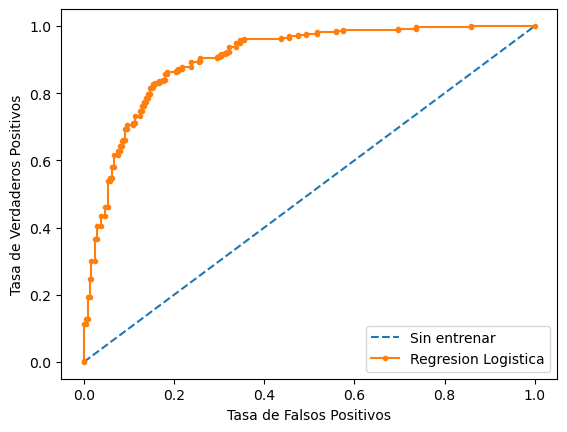

In [12]:
# Graficamos curvas ROC 
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresion Logistica')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show